In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Read into the clean_data csv
bmi_df = pd.read_csv('../csv/clean_data.csv')
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [3]:
# Convert Prevalent CHD to integer64 
bmi_df['PREVALENT CHD'] = np.where(bmi_df['PREVALENT CHD'] == 'YES', 1, 0)

bmi_df['PREVALENT CHD'] = bmi_df['PREVALENT CHD'].astype('int64')
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,0,1,28.73
1,6238,F,260.0,52,NO,0,2,0,2,29.43
2,6238,F,237.0,58,NO,0,2,0,3,28.50
3,11263,F,228.0,43,NO,0,2,0,1,30.30
4,11263,F,230.0,49,NO,0,2,0,2,31.36


In [4]:
# calculting the max value of BMI
max_bmi = bmi_df['BMI'].max()
max_bmi

56.8

In [5]:
# Establishing bins for BMI 
bins = [0, 18.5, 24.9, 29.9, max_bmi]
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

In [6]:
# Categorizing BMI into the esbalished bins 
bmi_df["BMI CATEGORY"] = pd.cut(bmi_df["BMI"], bins, labels= labels)
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,0,1,28.73,Overweight
1,6238,F,260.0,52,NO,0,2,0,2,29.43,Overweight
2,6238,F,237.0,58,NO,0,2,0,3,28.50,Overweight
3,11263,F,228.0,43,NO,0,2,0,1,30.30,Obesity
4,11263,F,230.0,49,NO,0,2,0,2,31.36,Obesity


Analysis for Period 1

In [7]:
# Create new DataFrame for Period 1 only 
bmiP1_df = bmi_df [bmi_df['PERIOD']==1]
bmiP1_df.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,0,1,28.73,Overweight
3,11263,F,228.0,43,NO,0,2,0,1,30.30,Obesity
6,14367,M,260.0,52,NO,0,1,0,1,26.36,Overweight
9,16365,M,225.0,43,YES,30,1,0,1,23.61,Healthy Weight
12,23727,F,332.0,41,NO,0,3,0,1,31.31,Obesity


In [57]:
# Creating the groupby BMI category:
grouped1_df = bmiP1_df.groupby(['BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
grouped1_df

,BMI CATEGORY,PREVALENT CHD
0,Underweight,0
1,Healthy Weight,22
2,Overweight,26
3,Obesity,16


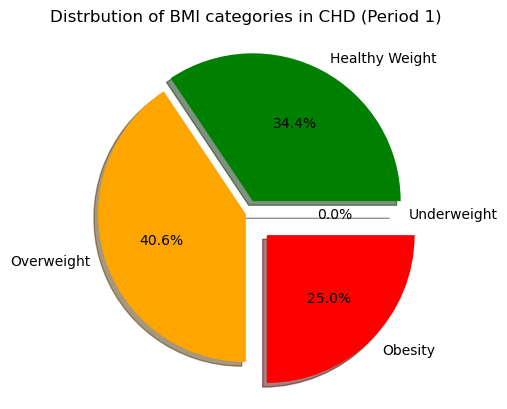

In [94]:
# Creating a pie chart
explode = (0, 0.1, 0, 0.2)
colors = ['grey', 'green', 'orange', 'red']

plt.pie(grouped1_df['PREVALENT CHD'], explode = explode, labels= grouped1_df['BMI CATEGORY'], 
        colors= colors, autopct="%1.1f%%", shadow= True)
plt.title('Distrbution of BMI categories in CHD (Period 1)')
plt.show()

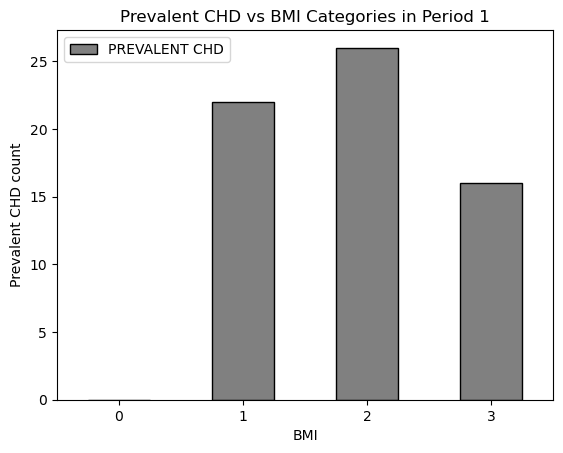

In [40]:
# Create bar chart for CHD count with BMI categories for Period 1
grouped1_df.plot(kind='bar', 
                color= ('grey'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI Categories in Period 1')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

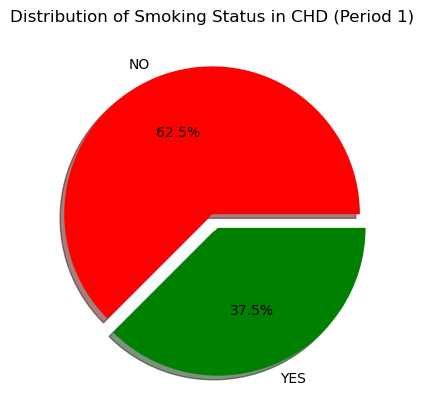

In [90]:
# Creating a grouby table by BMI and SMOKING STATUS
groupedP1_df = bmiP1_df.groupby(['SMOKING STATUS'])['PREVALENT CHD'].sum().reset_index()
groupedP1_df

# Creating a pie chart
explode = (0, 0.1)
colors = ['red', 'green']


plt.pie(groupedP1_df['PREVALENT CHD'], labels= groupedP1_df['SMOKING STATUS'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Smoking Status in CHD (Period 1)')
plt.show()

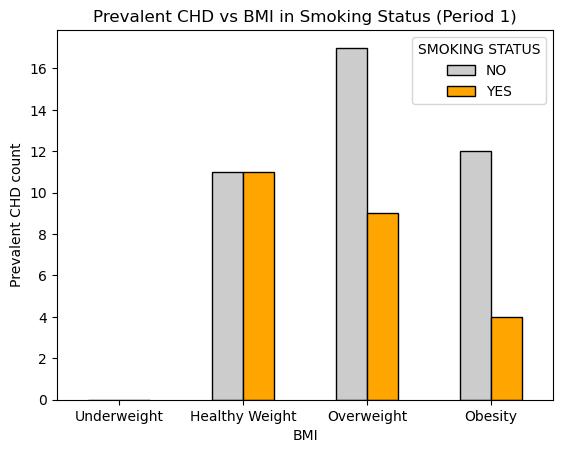

In [86]:
# Analyzing the trend BMI category vs CHD in smokers vs non-smokers in Period 1 

# Creating a grouby table by BMI and SMOKING STATUS
groupedP1_df = bmiP1_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedP1_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotP1_df = groupedP1_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP1_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP1_df.plot(kind='bar', 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Smoking Status (Period 1)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()


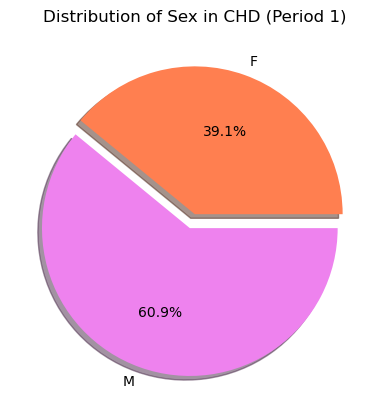

In [91]:
# Creating a grouby by SEX and BMI
groupedS1_df = bmiP1_df.groupby(['SEX'])['PREVALENT CHD'].sum().reset_index()
groupedS1_df

# Creating a pie chart
explode = (0, 0.1)
colors = ['coral', 'violet']


plt.pie(groupedS1_df['PREVALENT CHD'], labels= groupedS1_df['SEX'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Sex in CHD (Period 1)')
plt.show()

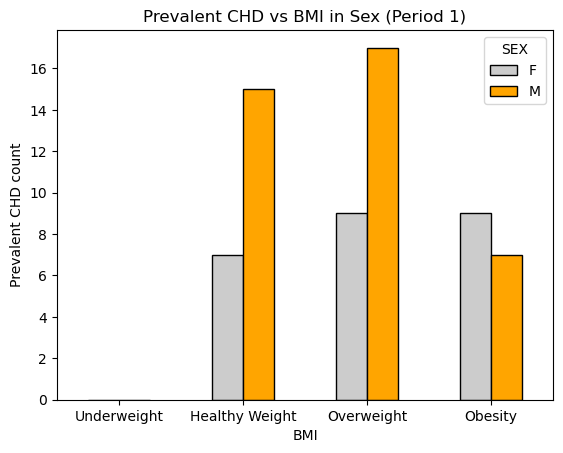

In [48]:
# Analyzing the trend of BMI category vs CHD in males vs females in Period 1 

# Creating a grouby by SEX and BMI
groupedS1_df = bmiP1_df.groupby(['SEX', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedS1_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotS1_df = groupedS1_df.pivot(index = 'BMI CATEGORY', columns = 'SEX', values= 'PREVALENT CHD')
pivotS1_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde males and females 
pivotS1_df.plot(kind='bar', 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Sex (Period 1)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

Analysis for Period 3

In [38]:
# Create new DataFrame for Period 3 only 
bmiP3_df = bmi_df [bmi_df['PERIOD']==3]
bmiP3_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
2,6238,F,237.0,58,NO,0,2,0,3,28.50,Overweight
5,11263,F,220.0,55,NO,0,2,0,3,31.17,Obesity
8,14367,M,280.0,64,NO,0,1,0,3,25.72,Overweight
11,16365,M,211.0,55,NO,0,1,0,3,29.11,Overweight
14,23727,F,159.0,53,NO,0,3,0,3,26.62,Overweight


In [39]:
# Creating the groupby BMI category:
grouped2_df = bmiP3_df.groupby(['BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
grouped2_df

,BMI CATEGORY,PREVALENT CHD
0,Underweight,5
1,Healthy Weight,124
2,Overweight,125
3,Obesity,46


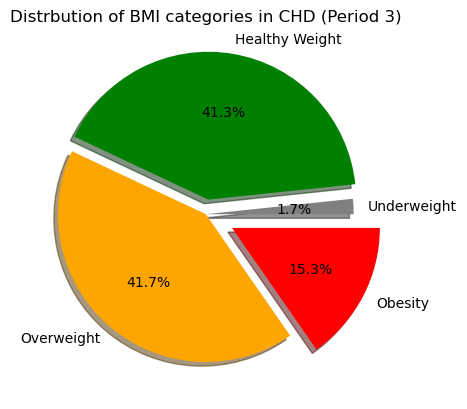

In [95]:
# Creating a pie chart
explode = (0, 0.1, 0, 0.2)
colors = ['grey', 'green', 'orange', 'red']

plt.pie(grouped2_df['PREVALENT CHD'], explode = explode, labels= grouped2_df['BMI CATEGORY'], 
        colors= colors, autopct="%1.1f%%", shadow= True)
plt.title('Distrbution of BMI categories in CHD (Period 3)')
plt.show()

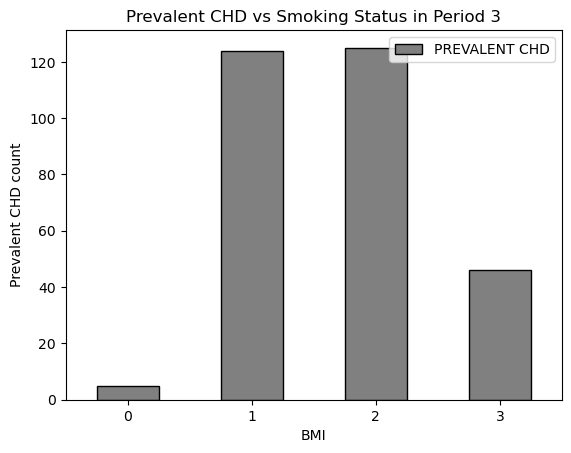

In [43]:
# Create bar chart for CHD count with BMI categories for Period 3
grouped2_df.plot(kind='bar', 
                color= ('grey'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs Smoking Status in Period 3')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

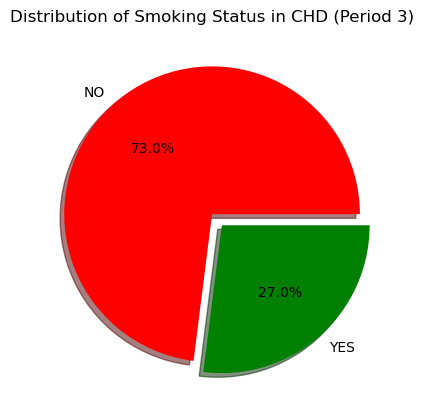

In [92]:
# Creating a grouby table by BMI and SMOKING STATUS
groupedP3_df = bmiP3_df.groupby(['SMOKING STATUS'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1)
colors = ['red', 'green']


plt.pie(groupedP3_df['PREVALENT CHD'], labels= groupedP3_df['SMOKING STATUS'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Smoking Status in CHD (Period 3)')
plt.show()

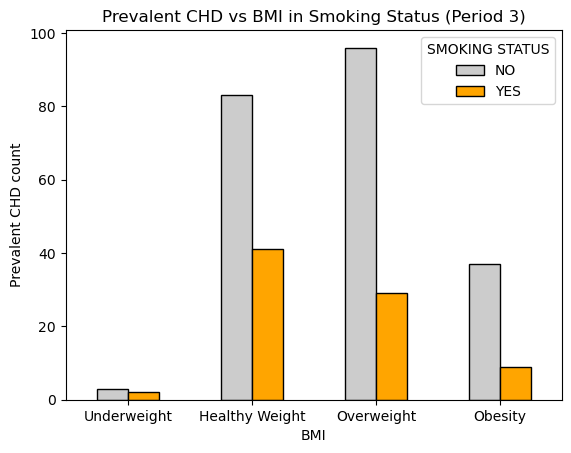

In [47]:
# Analayzing the trend of BMI vs CHD in smokers vs non-smokers in Period 3 

# Creating a grouby by SMOKING STATUS and BMI
groupedP3_df = bmiP3_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedP3_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotP3_df = groupedP3_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP3_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP3_df.plot(kind='bar', 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Smoking Status (Period 3)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

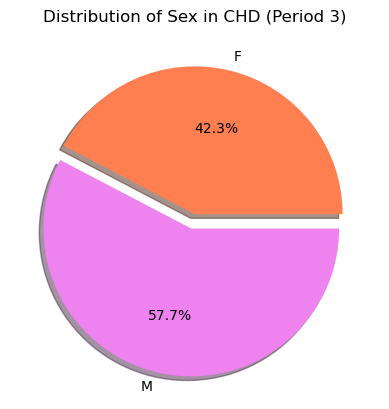

In [93]:
# Creating a grouby by SEX and BMI
groupedS3_df = bmiP3_df.groupby(['SEX'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1)
colors = ['coral', 'violet']


plt.pie(groupedS3_df['PREVALENT CHD'], labels= groupedS3_df['SEX'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Sex in CHD (Period 3)')
plt.show()

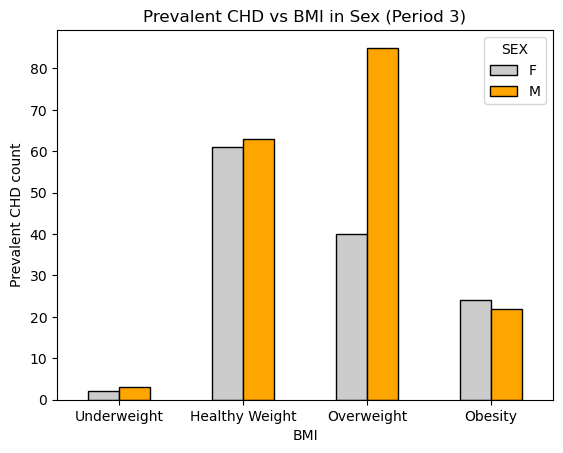

In [46]:
# Analyzing the trend of BMI vs CHD in males vs females 

# Creating a grouby by SEX and BMI
groupedS3_df = bmiP3_df.groupby(['SEX', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedS3_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotS3_df = groupedS3_df.pivot(index = 'BMI CATEGORY', columns = 'SEX', values= 'PREVALENT CHD')
pivotS3_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde males and females 
pivotS3_df.plot(kind='bar', 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Sex (Period 3)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

Chi Square analysis

Null hypothesis: Smoking is not correlating with higher prevelance of CHD, across all BMI levels

In [ ]:
# Initial observations BMI data: 
    # The total number of smokers with CHD had increased from P1 to P3 
    # The total cases of CHD has increased from P1 to P3


# To verify we're all on right track 
# There should be 64 cases of CHD in Period 1, and 300 cases of CHD in Period 3
